# Project Proposal

## Introduction

## Preliminary exploratory data analysis
1) We begin the data analysis by downloading the dataset as .xls format, and reading the data using read_excel. To do so, we use the package readxl and other packages necessary for our data analysis. The data given is already split into training data and testing data. We can read these to objects 'training_data' and 'testing_data'.

In [4]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(gridExtra)
install.packages("psych")
library(psych)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
# show data can be read
train_data <- read_excel("Data_User.xls", sheet="Training_Data") |>
              select(STG:UNS)
test_data <- read_excel("Data_User.xls", sheet="Test_Data") |>
              select(STG:UNS)

# i have sliced this data to show our data tables - Jayden
slice(train_data, 1:6)

slice(test_data, 1:6)

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


The dataset is already tidy. The only adjustment we need to make is to change the target variable's (UNS) character type to a factor type for both testing and training data.

In [6]:
#tidy data: turn UNS into factors in both sets of data
train_data <- train_data |>
mutate(UNS = as_factor(UNS))

test_data <- test_data |>
mutate(UNS = as_factor(UNS))

slice(train_data, 1:6)

slice(test_data, 1:6)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


For our exploratory data analysis, we summarize the data of the predictors into one table using **describe()** from the package **psych**. The number of observations for each class in the target variable UNS is 

In [7]:
#Summary table for predictors in train-data
summary_pred_train <- describe(train_data[-6], fast=TRUE)
summary_pred_train

UNS_count <- train_data |>
group_by(UNS) |>
    summarise(count = n())

UNS_count

,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STG,1,258,0.3711473,0.2102712,0,0.99,0.99,0.01309091
SCG,2,258,0.3556744,0.2119623,0,0.90,0.90,0.01319620
STR,3,258,0.4680039,0.2459398,0,0.95,0.95,0.01531154
LPR,4,258,0.4327132,0.2481080,0,0.99,0.99,0.01544653
PEG,5,258,0.4585388,0.2552109,0,0.93,0.93,0.01588874


UNS,count
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


Considering that all predictors in the training dataset are continuous variables, we created individual histograms to display their distributions. After experimenting with several values of bins, we found bins=30 to be most clear in presentation. Looking at the plots below, distributions for STG and SCG are most smooth, while STR has the most noise. 

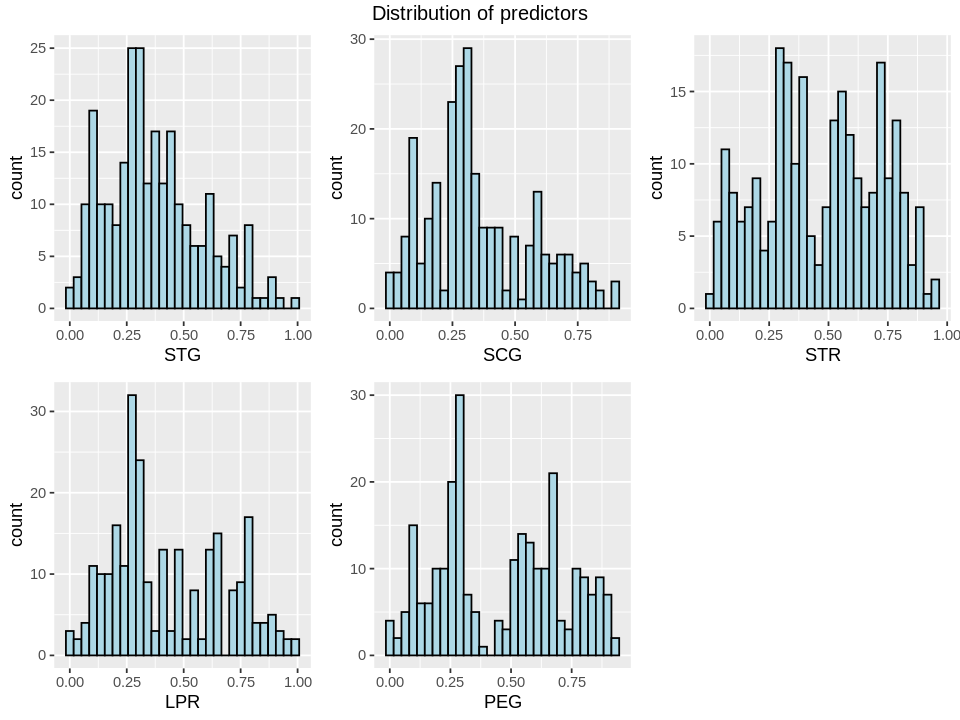

In [13]:
prawSTG <- ggplot(train_data, aes(STG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSCG <- ggplot(train_data, aes(SCG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSTR <- ggplot(train_data, aes(STR))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawLPR <- ggplot(train_data, aes(LPR))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawPEG <- ggplot(train_data, aes(PEG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

grid.arrange(prawSTG, prawSCG, prawSTR, prawLPR, prawPEG, ncol=3, top="Distribution of predictors")

## Methods

## Expected outcome and significance